In [1]:
import numpy as np
import itertools
pairs = []
for l in itertools.combinations(range(5), 2):
    pairs.append(l)

In [2]:
from sklearn.svm import LinearSVC
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from scipy.io import loadmat
from sklearn import preprocessing
from random import randint
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
def train_test_split(split_part):
    og_data = np.load('og_data1.npy')
    labels = np.load('labels1.npy')
    
    # Label encoder
    le = preprocessing.LabelEncoder()
    le.fit(labels)
    labels = le.transform(labels)
    x_train, x_test, y_train, y_test = [], [], [], []

    smin = 0
    smax = 1
    x = og_data
    xmax, xmin = x.max(), x.min()
    norm_data = (x - xmin)*(smax - smin)/(xmax - xmin) + smin

    # Sorting the data
    sorted_index = np.argsort(labels)
    sorted_labels = labels[sorted_index]
    sorted_og_data = og_data[sorted_index]
    sorted_norm_data = norm_data[sorted_index]

    # split the data into train and test
    test_random_indices = []
    for i in range(sorted_labels.shape[0]/split_part):
        index = i*split_part + randint(0, split_part - 1)
        test_random_indices.append(index)

    x_train = np.delete(sorted_norm_data, test_random_indices, 0)
    x_test = sorted_norm_data[test_random_indices]
    y_train = np.delete(sorted_labels, test_random_indices)
    y_test = sorted_labels[test_random_indices]
    
    return x_train, x_test, y_train, y_test

In [35]:
def plot(img):
#     x_train, x_test, y_train, y_test = train_test_split(6)
    fig = plt.figure(figsize=(14, 12))
    columns = 5
    rows = 5
    for i in range(columns*rows):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img[:,:, i])
        plt.axis('off')
    fig.subplots_adjust(wspace=0.01, hspace=0.01)
    plt.savefig("/Users/piyush.kumar/Desktop/airplane_voxel800.png", bbox_inches='tight', frameon=False)
# plot(og)

In [8]:
def get_verbs():
    layer_2 = np.load('keras/verb_vectors.npy')
    labels = np.load('keras/verb_labels.npy')
    
    x_train, x_test, y_train, y_test = train_test_split(6)
    
    le = preprocessing.LabelEncoder()
    le.fit(labels)
    labels = list(le.transform(labels))
    
    layer_2_train = []
    for yl in y_train:
        i = labels.index(yl)
        layer_2_train.append(layer_2[i])

    layer_2_test = []
    for yt in y_test:
        i = labels.index(yt)
        layer_2_test.append(layer_2[i])

    return x_train, x_test, y_train, y_test, np.array(layer_2_train), np.array(layer_2_test)

def get_mat(x_train):
    voxel_corr_matrix = []
    for i in range(x_train.shape[1]):
        voxel = x_train[:, i]
        pre_corr_matrix = []
        for j in range(60):
            k = j*5
            pre_corr_matrix.append(voxel[k:k+5])

        voxel_corr_matrix.append(np.transpose(pre_corr_matrix))

    voxel_corr_matrix = np.asarray(voxel_corr_matrix)
    
    return voxel_corr_matrix

In [9]:
LogisticRegressionr = []
for i in range(1):
    x_train, x_test, y_train, y_test, layer_2_train, layer_2_test = get_verbs()

    voxel_corr_matrix = get_mat(x_train)

    corr_arr = []
    for i in range(voxel_corr_matrix.shape[0]):
        voxel = voxel_corr_matrix[i]
        corr = 0.0
        for pair in pairs:
            corr += np.corrcoef(voxel[pair[0]], voxel[pair[1]])[0, 1]
        corr_arr.append(corr/len(pairs))

    c_a = np.asarray(corr_arr)
    sorted_index = np.argsort(c_a)[::-1]

#     x_t = x_train[:, sorted_index[:300]]
#     x_ts = x_test[:, sorted_index[:300]]
#     x_t = x_train
#     x_ts = x_test

#     clf = LinearSVC()
#     clf.fit(x_t, y_train)

#     results_top = []
#     for i in [1, 3, 5, 10]:
#         predicted_correct = 0
#         for k in range(y_test.shape[0]):
#             o = x_ts[k]
#             o = o.reshape(1, -1)
#             decision_lbl = clf.decision_function(o)[0]
#             top_class = i
#             top_n = np.argsort(decision_lbl)[::-1][:top_class]
#             if y_test[k] in top_n:
#                 predicted_correct += 1.0/60
#         print predicted_correct
#         results_top.append(predicted_correct)
#     LogisticRegressionr.append(results_top)

In [ ]:
print np.average(LogisticRegressionr, axis=0)
print np.std(LogisticRegressionr, axis=0)

In [36]:
noise = sorted_index[800:]

og_img = x_train[0]

reduced_img = np.copy(og_img)

reduced_img[noise] = 0.0
np.unique(x_train[0]).shape

(21764,)

In [37]:
val_index = loadmat('/Users/piyush.kumar/Documents/Archive/fMRI_project/data/val.mat')
val = val_index['X']
np_val = np.array(val, dtype=float)
for i in range(val.shape[0]):
    for j in range(val.shape[1]):
        for k in range(val.shape[2]):
            index = val[i][j][k]
            if index != 0:
                np_val[i][j][k] = reduced_img[index-1]

og = np.pad(np_val, ((0, 0), (0, 0), (1, 1)), 'constant', constant_values=(0.0))
print og.shape

(51, 61, 25)


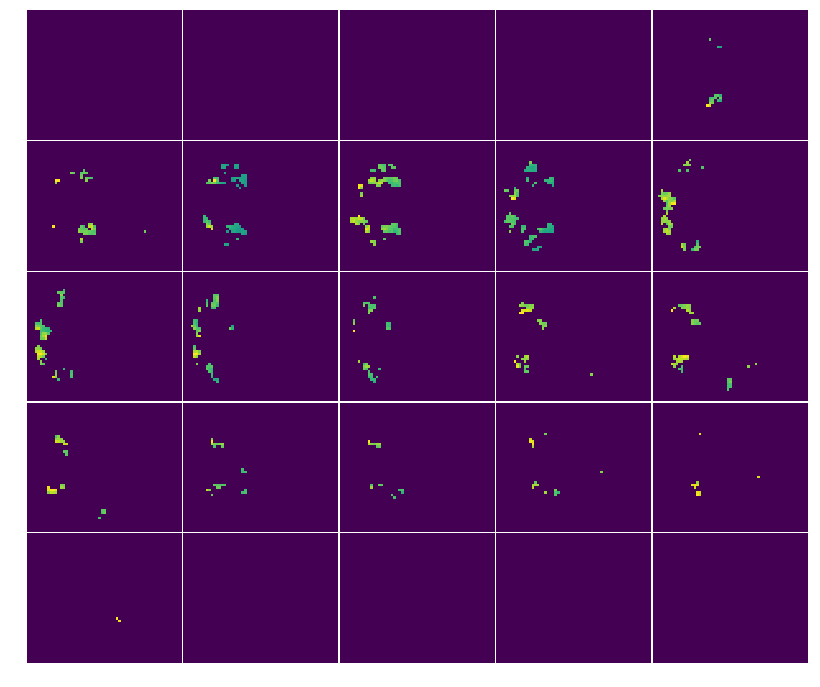

In [38]:
plot(og)

In [43]:
for i in [1, 3, 5, 10]:
    predicted_correct = 0
    for k in range(y_test.shape[0]):
        o = x_ts[k]
        o = o.reshape(1, -1)
        decision_lbl = clf.decision_function(o)[0]
        top_class = i
        top_n = np.argsort(decision_lbl)[::-1][:top_class]
        if y_test[k] in top_n:
            predicted_correct += 1.0/60
    print predicted_correct

0.483333333333
0.716666666667
0.783333333333
0.9


In [20]:
print x_t.shape, y_train.shape, layer_2_train.shape, layer_2_test.shape, x_ts.shape

(300, 1500) (300,) (300, 25) (60, 25) (60, 1500)


In [64]:
print x_t.shape
regr = LinearRegression()
regr.fit(x_t, layer_2_train)

output = regr.predict(x_ts)

(300, 5000)


/Users/piyush.kumar/thesis/lib/python2.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [65]:
clf = LinearSVC()
layer_2 = np.load('keras/verb_vectors.npy')
labels = np.load('keras/verb_labels.npy')
le = preprocessing.LabelEncoder()
le.fit(labels)
labels = list(le.transform(labels))

clf.fit(layer_2, labels)

for i in [1, 3, 5, 10]:
    predicted_correct = 0
    for k in range(y_test.shape[0]):
        o = output[k]
        o = o.reshape(1, -1)
        decision_lbl = clf.decision_function(o)[0]
        top_class = i
        top_n = np.argsort(decision_lbl)[::-1][:top_class]
        if y_test[k] in top_n:
            predicted_correct += 1.0/60
    print predicted_correct

0.183333333333
0.35
0.45
0.583333333333


In [92]:
predicted_correct = 0

predicted_labels = clf.predict(output)
for i in range(y_test.shape[0]):
    if predicted_labels[i] == y_test[i]:
        predicted_correct += 1
    print predicted_labels[i]

11
45
39
55
11
39
32
12
9
20
19
9
24
32
39
20
53
22
9
24
52
55
1
41
52
45
53
24
45
55
45
51
55
43
52
22
45
52
45
9
51
31
19
19
37
15
12
20
55
19
11
39
11
24
53
55
29
1
39
15


In [91]:
predicted_correct

1